# Loads the Twitter sentiment dataset, displays its shape and a sample, checks sentiment class distribution, maps sentiment values to labels, visualizes sentiment distribution, and prints example tweets for each sentiment class.

Dataset shape: (1600000, 6)

First few rows:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user  \
0  _TheSpecialOne_   
1    scotthamilton   
2         mattycus   
3          ElleCTF   
4           Karoli   

                                                                                                  text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Thi...  
1  is upset that he can't update his Facebook by texting it... and might cry as a result  School to...  
2            @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3          

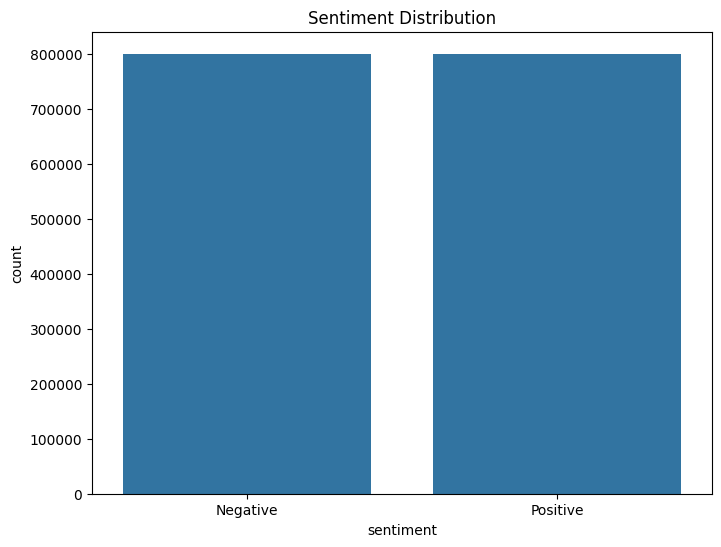


Negative tweet example:
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

Neutral tweet example:
No neutral tweets found

Positive tweet example:
I LOVE @Health4UandPets u guys r the best!! 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show more text content
pd.set_option('display.max_colwidth', 100)

# Define column names
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load the dataset
file_path = r"C:\Users\91939\Downloads\archive\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding='latin-1', names=columns)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Check class distribution
print("\nSentiment distribution:")
sentiment_counts = df['target'].value_counts().sort_index()
print(sentiment_counts)

# Map sentiment values to labels
df['sentiment'] = df['target'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'})

# Sample data visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.show()

# Display a few examples of each sentiment
print("\nNegative tweet example:")
print(df[df['target'] == 0]['text'].iloc[0])

print("\nNeutral tweet example:")
print(df[df['target'] == 2]['text'].iloc[0] if 2 in df['target'].values else "No neutral tweets found")

print("\nPositive tweet example:")
print(df[df['target'] == 4]['text'].iloc[0])

# This code loads the Twitter sentiment dataset, checks the unique sentiment classes present, and prints the count of each sentiment class in the dataset.

In [2]:
import pandas as pd

# Define column names
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load the dataset
file_path = r"C:\Users\91939\Downloads\archive\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding='latin-1', names=columns)

# Check unique values in the target column
unique_targets = df['target'].unique()
print(f"Unique sentiment classes in dataset: {unique_targets}")

# Count of each class
class_distribution = df['target'].value_counts().sort_index()
print("\nClass distribution:")
print(class_distribution)

Unique sentiment classes in dataset: [0 4]

Class distribution:
target
0    800000
4    800000
Name: count, dtype: int64


# This code performs comprehensive data preprocessing and cleaning:

Loads the dataset and displays basic info and sentiment distribution.
Maps sentiment values to labels and visualizes the distribution.
Sets up NLTK resources for text processing.
Defines an advanced tweet preprocessing function (handles cleaning, normalization, contractions, slang, emojis, emoticons, stopwords, lemmatization).
Processes a sample, then the full dataset, and compares original vs processed tweets.
Saves the processed dataset, analyzes missing values, visualizes missing data, and removes rows with missing processed text.
Saves the final cleaned dataset for further analysis.

Dataset shape: (1600000, 6)

First few rows:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user  \
0  _TheSpecialOne_   
1    scotthamilton   
2         mattycus   
3          ElleCTF   
4           Karoli   

                                                                                                  text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Thi...  
1  is upset that he can't update his Facebook by texting it... and might cry as a result  School to...  
2            @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds  
3          

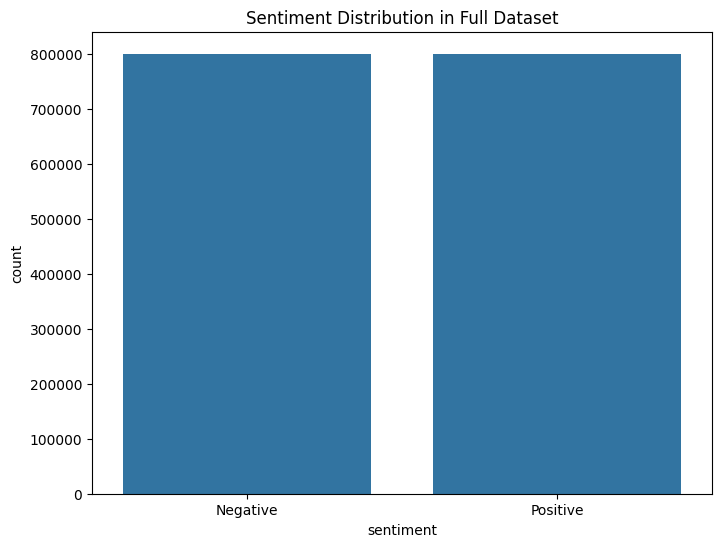

Resource 'punkt' already downloaded


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91939\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\91939\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processing sample of 1000 tweets to verify functionality...
Sample processing successful. Processing the full dataset...

Comparison of original vs processed tweets:
  sentiment  \
0  Negative   
1  Negative   
2  Negative   
3  Negative   
4  Negative   

                                                                                                         original_text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D   
1      is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!   
2                            @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds   
3                                                                      my whole body feels itchy and like its on fire    
4      @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.    

          

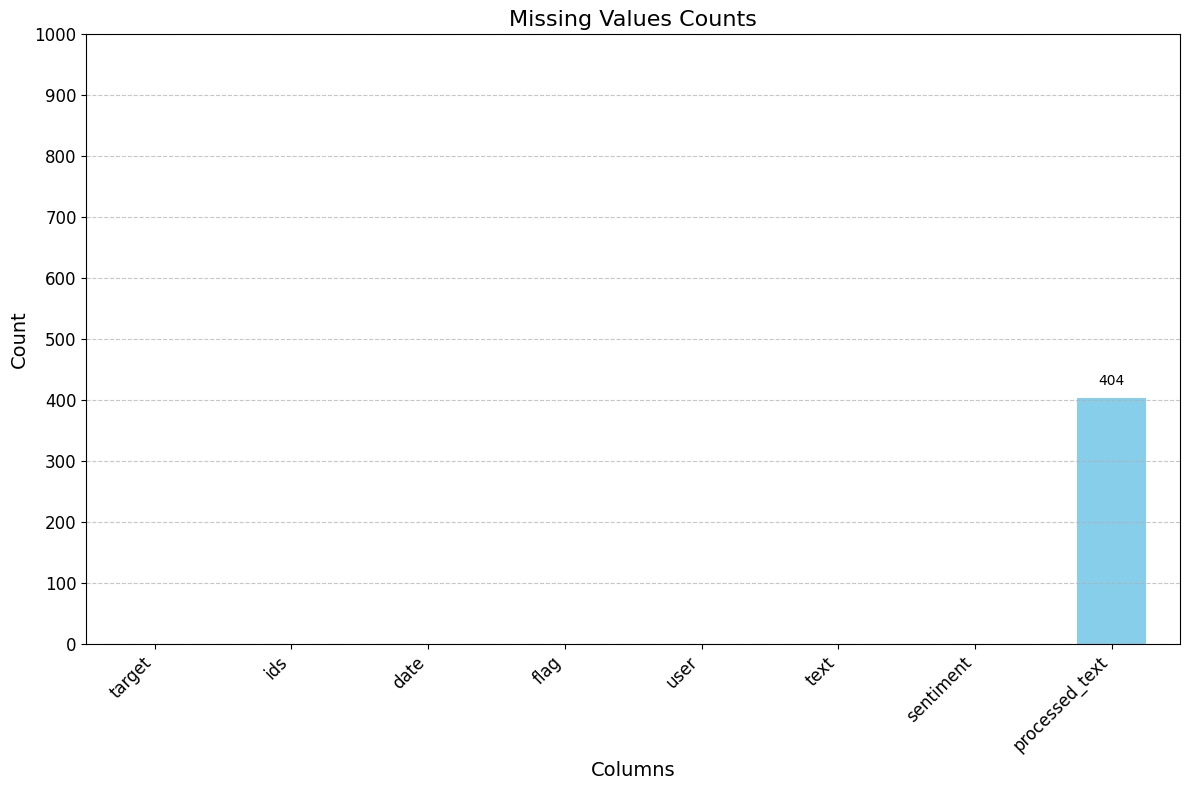


Conclusion:
- Total missing values in processed_text: 404 rows
- Dataset size: 1600000 rows
- Removing these rows is recommended since:
  1. The dataset is large enough that removing a small number of rows won't affect performance
  2. The original texts that failed processing appear to be very short with limited information
  3. Keeping clean data will lead to more reliable models

After removal: 1599596 rows (removed 404 rows with missing values)
Cleaned dataset saved to 'processed_twitter_sentiment_clean.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import os
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Set display options to show more text content
pd.set_option('display.max_colwidth', 100)

# Define column names
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Load the dataset
file_path = r"C:\Users\91939\Downloads\archive\training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding='latin-1', names=columns)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Check class distribution
print("\nSentiment distribution:")
sentiment_counts = df['target'].value_counts().sort_index()
print(sentiment_counts)

# Map sentiment values to labels
df['sentiment'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# Data visualization of sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in Full Dataset')
plt.savefig('sentiment_distribution_full.png')
plt.show()

# Setup NLTK data path and ensure resources are downloaded
nltk_data_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
os.makedirs(nltk_data_dir, exist_ok=True)

# Add the custom path to NLTK's data path search list
nltk.data.path.append(nltk_data_dir)

# Download required resources with verification
for resource in ['punkt', 'stopwords', 'wordnet']:
    try:
        nltk.data.find(f'tokenizers/{resource}')
        print(f"Resource '{resource}' already downloaded")
    except LookupError:
        print(f"Downloading '{resource}'...")
        nltk.download(resource, download_dir=nltk_data_dir, quiet=False)

# Create an enhanced preprocessing function with improved handling
def preprocess_tweet(text):
    """
    Enhanced tweet preprocessing function with improved handling of contractions,
    emoticons, slang, and more comprehensive text normalization
    """
    try:
        # Handle None or empty strings
        if text is None or text == "":
            return ""
        
        # Convert to string if not already
        text = str(text)
        
        # 1. General Text Cleaning
        # Lowercase conversion
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # 2. Twitter-specific preprocessing
        # Replace URLs with placeholder
        text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)
        
        # Replace user mentions with placeholder
        text = re.sub(r'@\w+', 'MENTION', text)
        
        # Handle hashtags (remove # but keep the word)
        text = re.sub(r'#(\w+)', r'\1', text)
        
        # Remove RT (retweet) and FAV (favorite) indicators
        text = re.sub(r'\brt\b|\bfav\b', '', text)
        
        # 3. IMPROVED: Standardize contractions
        contractions = {
            "cant": "cannot", "can't": "cannot", 
            "wont": "will not", "won't": "will not",
            "im": "i am", "i'm": "i am",
            "dont": "do not", "don't": "do not", 
            "didnt": "did not", "didn't": "did not",
            "couldnt": "could not", "couldn't": "could not",
            "shouldnt": "should not", "shouldn't": "should not",
            "wouldnt": "would not", "wouldn't": "would not",
            "ive": "i have", "i've": "i have",
            "youre": "you are", "you're": "you are",
            "theyre": "they are", "they're": "they are",
            "isnt": "is not", "isn't": "is not",
            "arent": "are not", "aren't": "are not",
            "wasnt": "was not", "wasn't": "was not",
            "werent": "were not", "weren't": "were not",
            "havent": "have not", "haven't": "have not",
            "hasnt": "has not", "hasn't": "has not",
            "hadnt": "had not", "hadn't": "had not",
            "weve": "we have", "we've": "we have",
            "youve": "you have", "you've": "you have",
            "theyve": "they have", "they've": "they have",
            "whats": "what is", "what's": "what is",
            "thats": "that is", "that's": "that is",
            "whos": "who is", "who's": "who is",
            "hes": "he is", "he's": "he is", 
            "shes": "she is", "she's": "she is",
            "its": "it is", "it's": "it is",
            "lets": "let us", "let's": "let us",
            "heres": "here is", "here's": "here is",
            "theres": "there is", "there's": "there is",
            "wheres": "where is", "where's": "where is",
            "howd": "how did", "how'd": "how did",
            "whyd": "why did", "why'd": "why did",
            "whatd": "what did", "what'd": "what did",
            "gonna": "going to", "gotta": "got to", "wanna": "want to",
            "ya": "you", "u": "you", "ur": "your"
        }
        
        # Apply contractions - word boundary check to ensure we don't replace substrings of words
        for contraction, expansion in contractions.items():
            text = re.sub(r'\b' + contraction + r'\b', expansion, text)
        
        # 4. IMPROVED: Handle emojis - convert to text representation
        text = emoji.demojize(text)
        
        # 5. IMPROVED: Replace emoticons with text representations (more comprehensive)
        emoticons = {
            ':)': 'happy', ':-)': 'happy', '(:': 'happy', '(-:': 'happy',
            ':(': 'sad', ':-(': 'sad', '):': 'sad', ')-:': 'sad',
            ';)': 'wink', ';-)': 'wink', 
            ':D': 'laugh', ':-D': 'laugh', 'XD': 'laugh', 'xD': 'laugh',
            ':p': 'tongue', ':-p': 'tongue', ':P': 'tongue', ':-P': 'tongue',
            ':o': 'surprise', ':-o': 'surprise', ':O': 'surprise', ':-O': 'surprise',
            ':3': 'cute', ':-3': 'cute',
            ':*': 'kiss', ':-*': 'kiss',
            ':<': 'sad', '>:(': 'angry', ':@': 'angry',
            ':s': 'confused', ':S': 'confused',
            ':/': 'skeptical', ':\\': 'skeptical',
            ':|': 'neutral', ':-|': 'neutral',
            ':$': 'embarrassed',
            '<3': 'love'
        }
        for emoticon, replacement in emoticons.items():
            text = text.replace(emoticon, f' {replacement} ')
        
        # 6. IMPROVED: Normalize internet slang
        slang = {
            'lol': 'laugh', 'rofl': 'laugh', 'lmao': 'laugh', 'lmfao': 'laugh',
            'idk': 'do not know', 'idc': 'do not care', 'idgaf': 'do not care',
            'omg': 'surprised', 'wtf': 'surprised', 'wth': 'surprised',
            'tbh': 'honest', 'fyi': 'information', 'imo': 'opinion', 'imho': 'opinion',
            'af': 'very', 'rn': 'right now', 'bf': 'boyfriend', 'gf': 'girlfriend',
            'fb': 'facebook', 'ig': 'instagram', 'dm': 'message',
            'btw': 'by the way', 'brb': 'be right back', 'ttyl': 'talk later',
            'thx': 'thanks', 'ty': 'thank you', 'thnx': 'thanks', 'pls': 'please',
            'plz': 'please', 'bc': 'because', 'cuz': 'because', 'cos': 'because',
            'b4': 'before', '2day': 'today', '2moro': 'tomorrow', 'l8r': 'later',
            'gr8': 'great', 'fam': 'family', 'bro': 'brother', 'sis': 'sister',
            'ikr': 'i know right', 'jk': 'joking', 'sry': 'sorry',
            'np': 'no problem', 'nvm': 'never mind', 'tmi': 'too much information',
            'fml': 'frustration', 'smh': 'disappointment', 'yolo': 'carpe diem',
            'iirc': 'if i recall correctly', 'irl': 'in real life'
        }
        
        # Apply slang normalization with word boundaries
        for s, replacement in slang.items():
            text = re.sub(r'\b' + s + r'\b', replacement, text)
        
        # 7. Remove punctuation (after handling contractions and emoticons)
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # 8. Remove numbers
        text = re.sub(r'\d+', '', text)
        
        # 9. Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # 10. Tokenization, Stopword Removal, and Lemmatization
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        # Keep negation words which are important for sentiment
        negation_words = {'no', 'not', 'nor', 'neither', 'never', 'none'}
        stop_words = stop_words - negation_words
        tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into a string
        processed_text = ' '.join(tokens)
        
        return processed_text
    
    except Exception as e:
        print(f"Error processing text: {e}")
        # Return original text if processing fails
        return text

# Process a small sample first to verify functionality
sample_size = 1000
print(f"Processing sample of {sample_size} tweets to verify functionality...")
sample_df = df.head(sample_size).copy()
sample_df['processed_text'] = sample_df['text'].apply(preprocess_tweet)

# If the sample works, process the full dataset
print("Sample processing successful. Processing the full dataset...")
df['processed_text'] = df['text'].apply(preprocess_tweet)

# Display comparison
comparison_df = pd.DataFrame({
    'sentiment': df['sentiment'].head(5),
    'original_text': df['text'].head(5),
    'processed_text': df['processed_text'].head(5)
})

print("\nComparison of original vs processed tweets:")
pd.set_option('display.max_colwidth', None)
print(comparison_df)

# Save the processed dataset to a CSV file
df.to_csv('processed_twitter_sentiment_full.csv', index=False)
print("Processed full dataset saved to 'processed_twitter_sentiment_full.csv'")

# ---- MISSING VALUES ANALYSIS AND DATASET CLEANING ----

# Load the processed dataset
print("\nLoading the processed dataset for missing values analysis...")
df = pd.read_csv('processed_twitter_sentiment_full.csv')

# Calculate counts of missing values in each column
missing_values = df.isnull().sum()

# Create visualization with counts instead of percentages
plt.figure(figsize=(12, 8))
ax = missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Counts", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Columns", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis to 0-1000 with intervals of 100
plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1001, 100), fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(missing_values):
    if v > 0:
        plt.text(i, v + 20, f'{v}', ha='center', fontsize=10)

# Add an inset for columns with higher counts (if any)
columns_with_high_counts = missing_values[missing_values > 1000]
if not columns_with_high_counts.empty:
    axins = zoomed_inset_axes(ax, zoom=0.5, loc='upper right')
    columns_with_high_counts.plot(kind='bar', ax=axins, color='salmon')
    axins.set_title("Columns with >1000 missing values", fontsize=10)
    axins.tick_params(labelsize=8)
    axins.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels in the inset
    for i, v in enumerate(columns_with_high_counts):
        axins.text(i, v + 50, f'{v}', ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('missing_values_counts_1k_scale.png', dpi=300)
plt.show()

# Print conclusion with actual counts
print("\nConclusion:")
print(f"- Total missing values in processed_text: {df['processed_text'].isna().sum()} rows")
print(f"- Dataset size: {len(df)} rows")
print("- Removing these rows is recommended since:")
print("  1. The dataset is large enough that removing a small number of rows won't affect performance")
print("  2. The original texts that failed processing appear to be very short with limited information")
print("  3. Keeping clean data will lead to more reliable models")

# Remove rows with missing processed_text
df_clean = df.dropna(subset=['processed_text'])
print(f"\nAfter removal: {len(df_clean)} rows (removed {len(df) - len(df_clean)} rows with missing values)")

# Save the cleaned dataset to a new CSV file
output_filename = 'processed_twitter_sentiment_clean.csv'
df_clean.to_csv(output_filename, index=False)
print(f"Cleaned dataset saved to '{output_filename}'")

In [5]:
df=pd.read_csv('processed_twitter_sentiment_clean.csv')

# This code performs exploratory data analysis (EDA) on the processed tweets:

Analyzes tweet lengths (character and word count), provides summary statistics, and visualizes distributions by sentiment.
Generates word clouds for all, positive, and negative tweets.
Computes and visualizes the most common unigrams, bigrams, and trigrams for each sentiment.
Identifies and prints the most distinctive terms for positive and negative tweets using n-gram frequency ratios.
Provides insights and recommendations for deep learning sequence length based on tweet word counts.

Tweet Length Statistics (Full Dataset):
        char_length    word_count
count  1.599596e+06  1.599596e+06
mean   4.635125e+01  7.605327e+00
std    2.402685e+01  3.890549e+00
min    1.000000e+00  1.000000e+00
25%    2.700000e+01  4.000000e+00
50%    4.300000e+01  7.000000e+00
75%    6.400000e+01  1.000000e+01
max    1.019000e+03  5.600000e+01

Tweet Length Statistics by Sentiment (Full Dataset):
          char_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
sentiment                                                                    
Negative     799804.0  46.462169  24.183576  1.0  27.0  43.0  64.0  1011.0   
Positive     799792.0  46.240332  23.868597  1.0  27.0  43.0  63.0  1019.0   

          word_count                                                 
               count      mean       std  min  25%  50%   75%   max  
sentiment                                                            

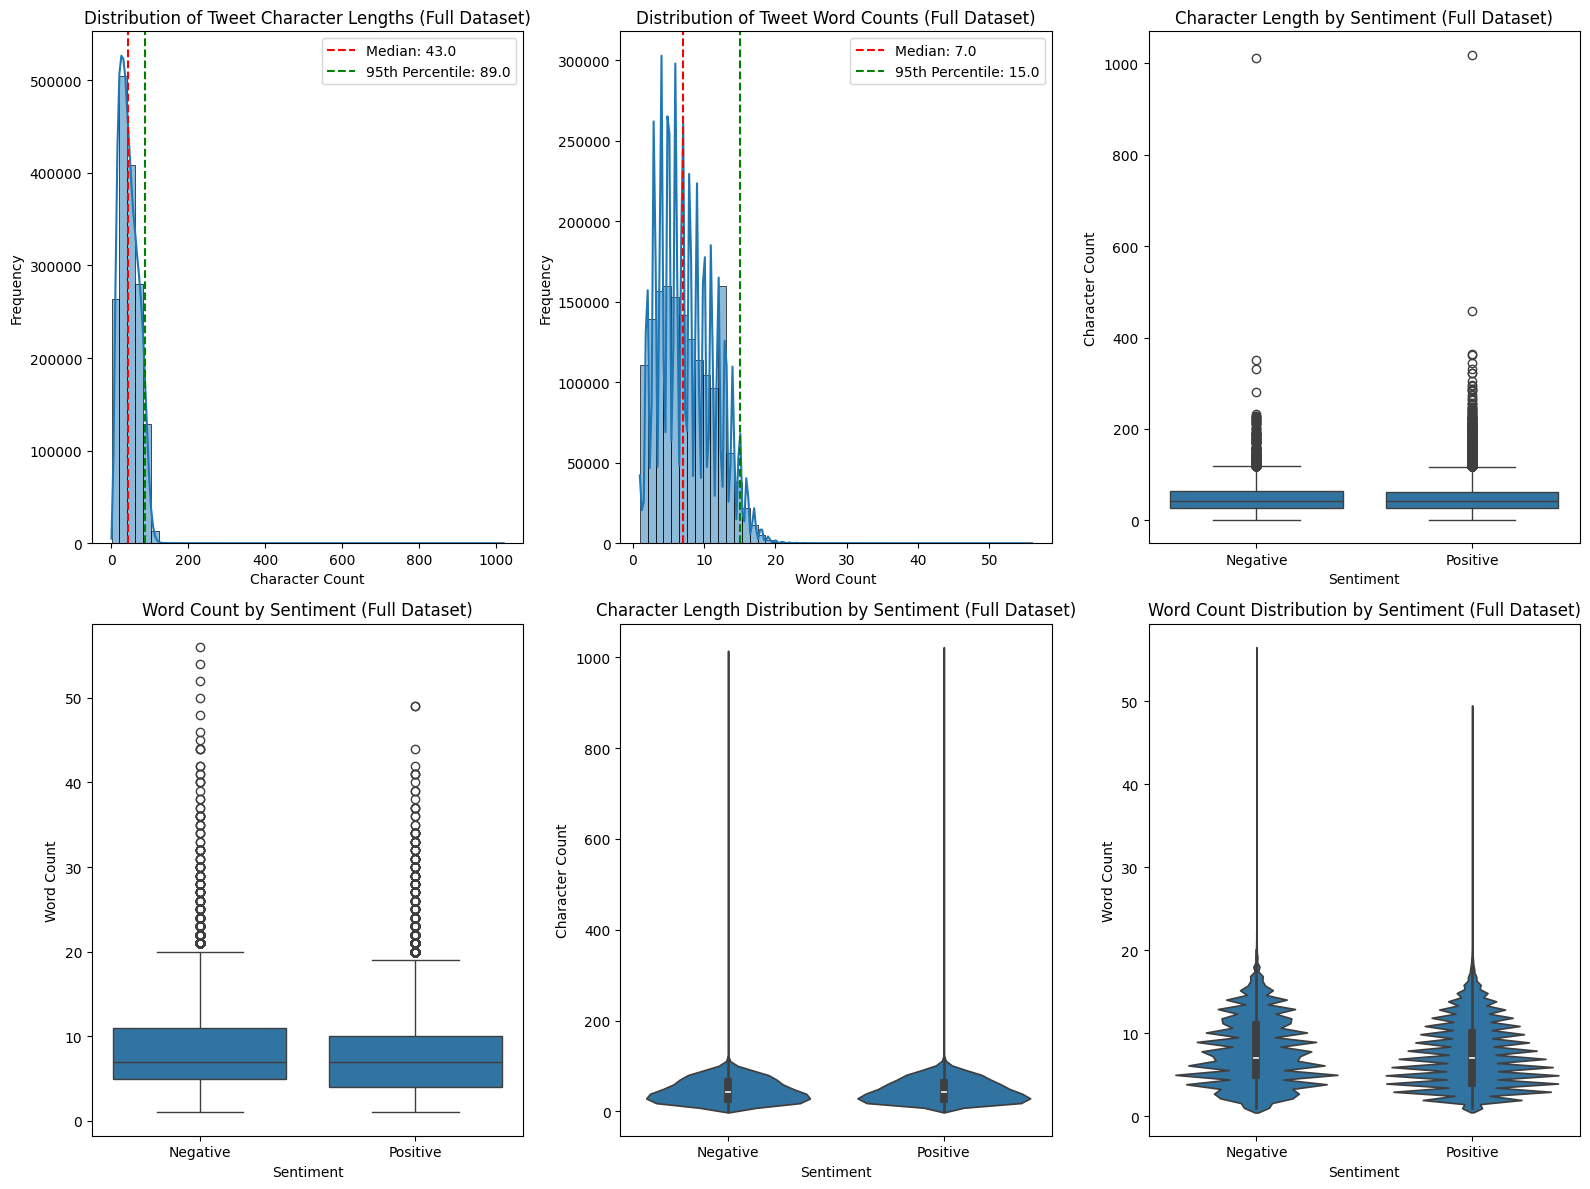


Recommendation for sequence length in deep learning models:
- Based on the 95th percentile of word counts (15), consider using a sequence length of 15
- This would adequately capture the vast majority of tweets while minimizing padding
Generating word clouds (this may take some time with the full dataset)...


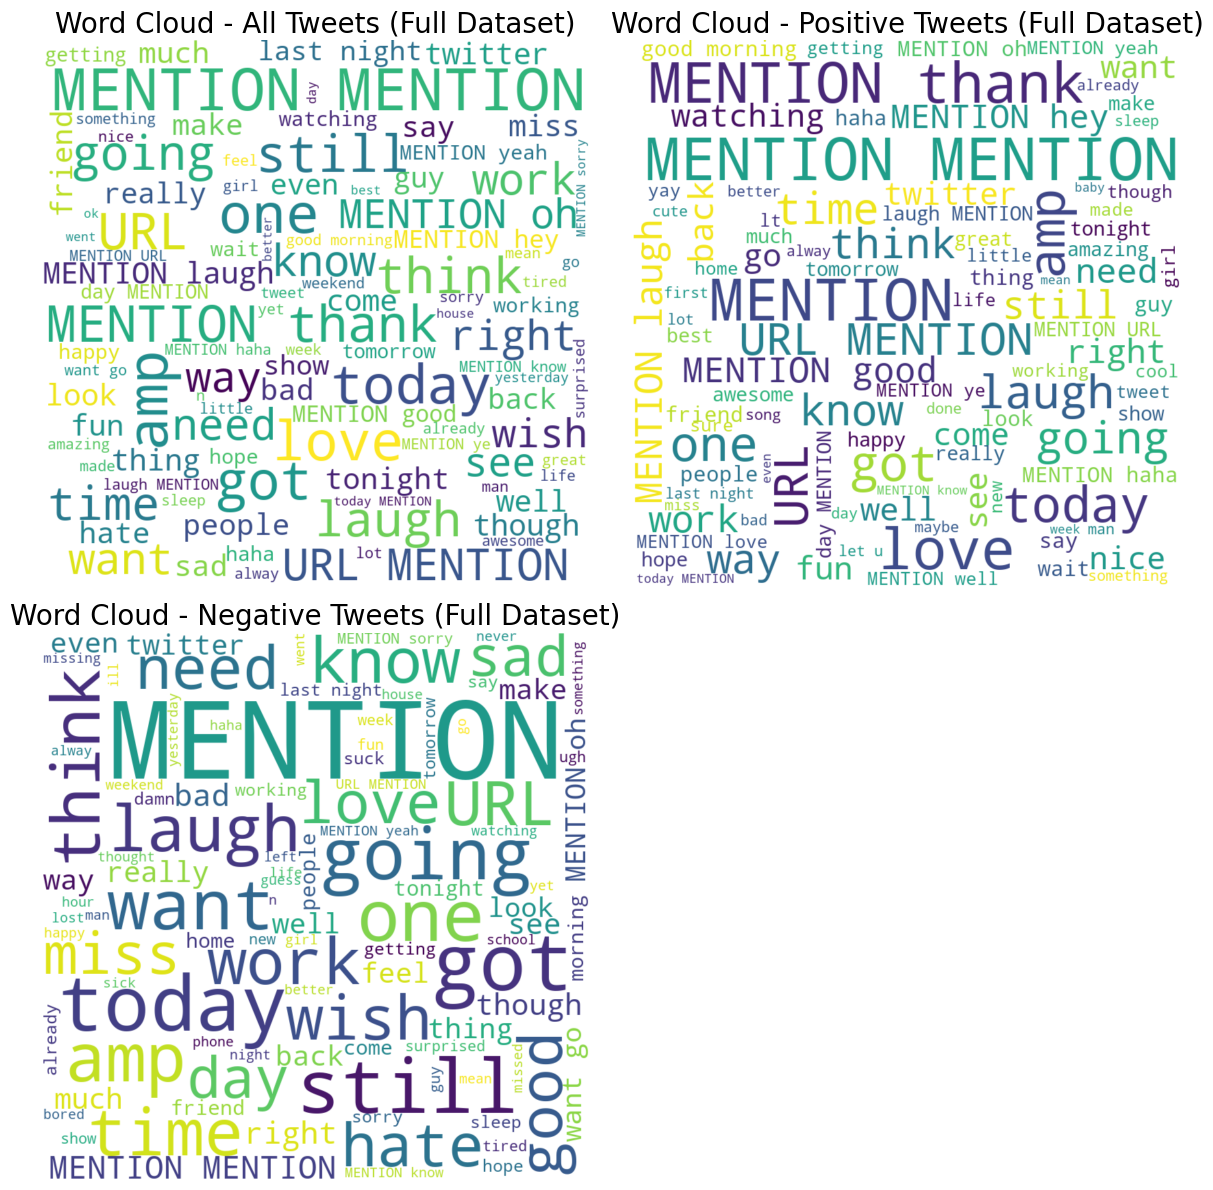

Calculating n-grams (this may take some time with the full dataset)...
Calculating unigrams...
Calculating bigrams...
Calculating trigrams...
Plotting n-grams...


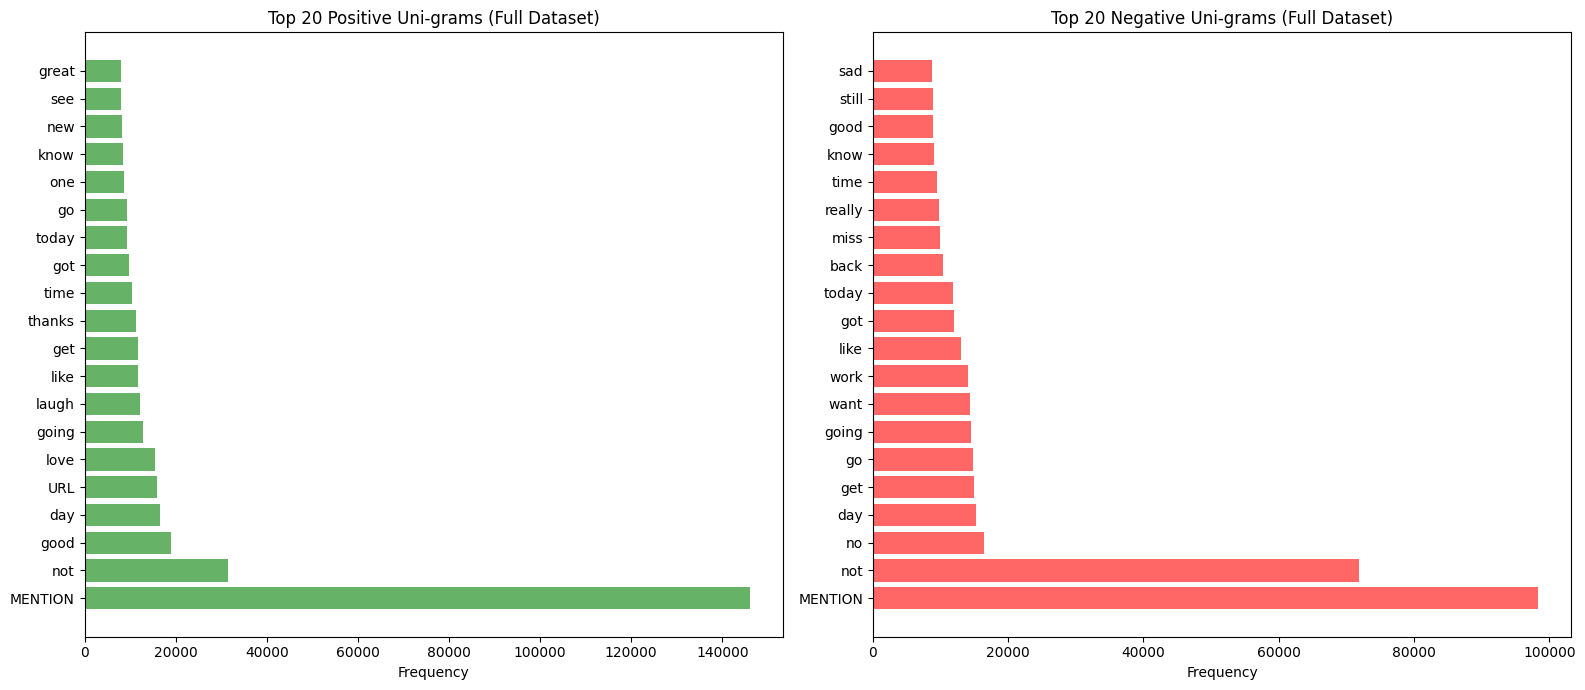

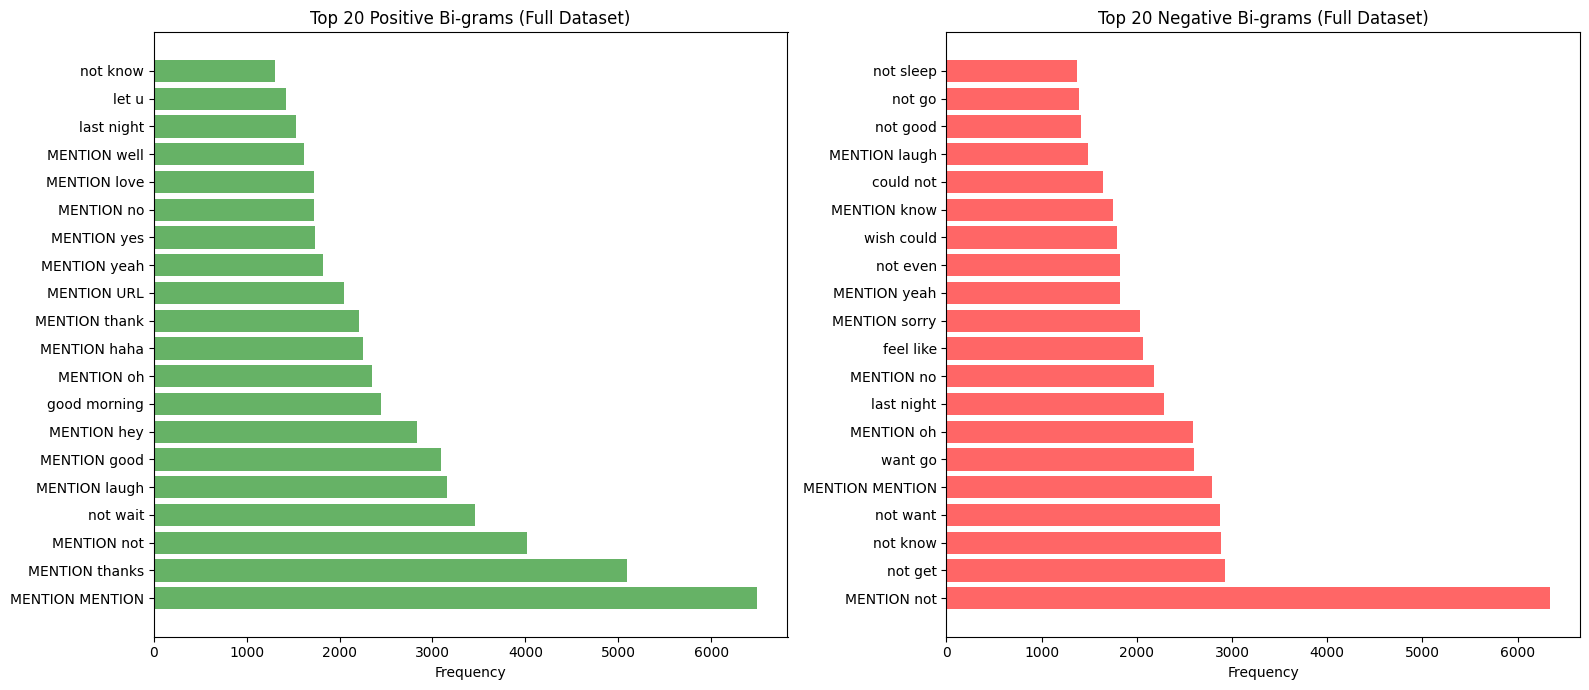

C:\Users\91939\AppData\Local\Temp\ipykernel_9068\3728269893.py:209: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91939\AppData\Local\Temp\ipykernel_9068\3728269893.py:210: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.savefig(f'top_{n}grams_full.png', dpi=300)
C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


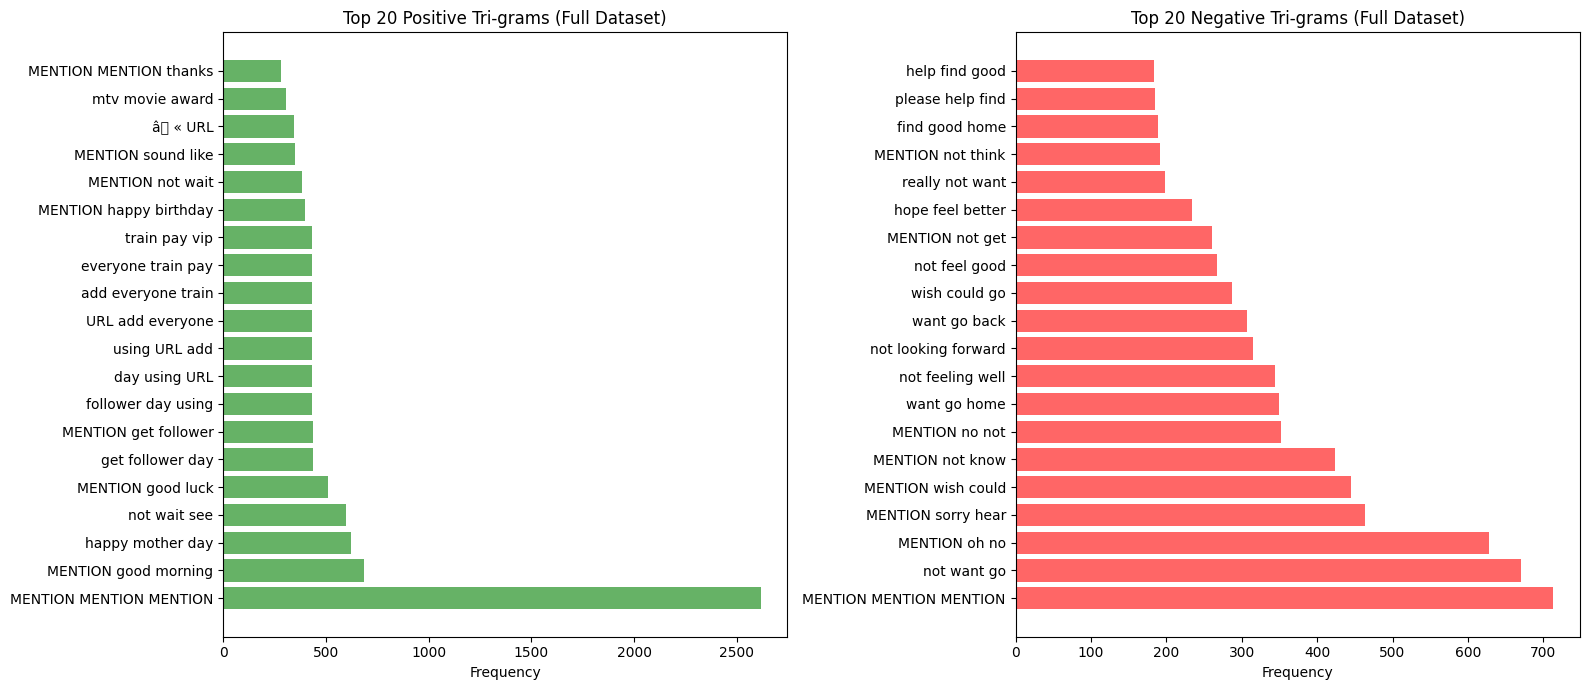


Insights from N-gram Analysis (Full Dataset):
1. Top positive unigrams: ['MENTION', 'not', 'good', 'day', 'URL']
2. Top negative unigrams: ['MENTION', 'not', 'no', 'day', 'get']
3. Top positive bigrams: ['MENTION MENTION', 'MENTION thanks', 'MENTION not', 'not wait', 'MENTION laugh']
4. Top negative bigrams: ['MENTION not', 'not get', 'not know', 'not want', 'MENTION MENTION']
5. Top positive trigrams: ['MENTION MENTION MENTION', 'MENTION good morning', 'happy mother day', 'not wait see', 'MENTION good luck']
6. Top negative trigrams: ['MENTION MENTION MENTION', 'not want go', 'MENTION oh no', 'MENTION sorry hear', 'MENTION wish could']
Calculating distinctive terms...

Most Distinctive Unigrams by Sentiment (Full Dataset):
Distinctively Positive: ['URL', 'love', 'laugh', 'thanks', 'one', 'new', 'see', 'great', 'good', 'MENTION']
Distinctively Negative: ['no', 'want', 'work', 'back', 'miss', 'really', 'still', 'sad', 'not', 'go']

Top 10 Most Distinctive Positive Unigrams:
URL: Pos=16

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import matplotlib.gridspec as gridspec

# Ensure wordcloud is installed
# !pip install wordcloud

# Load the processed dataset if needed (if not continuing from previous cell)
# df = pd.read_csv('processed_twitter_sentiment_full.csv')

#------------------------------------------------------
# 4.2. Text Length Analysis
#------------------------------------------------------

# Calculate character length and word count for each processed tweet
df['char_length'] = df['processed_text'].str.len()
df['word_count'] = df['processed_text'].str.split().str.len()

# Summary statistics
print("Tweet Length Statistics (Full Dataset):")
length_stats = df[['char_length', 'word_count']].describe()
print(length_stats)

# Further analyze by sentiment
sentiment_length_stats = df.groupby('sentiment')[['char_length', 'word_count']].describe()
print("\nTweet Length Statistics by Sentiment (Full Dataset):")
print(sentiment_length_stats)

# Create a figure with subplots for visualizations
plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 3)

# Character length histogram
ax0 = plt.subplot(gs[0, 0])
sns.histplot(df['char_length'], bins=50, kde=True, ax=ax0)
ax0.set_title('Distribution of Tweet Character Lengths (Full Dataset)')
ax0.set_xlabel('Character Count')
ax0.set_ylabel('Frequency')
ax0.axvline(x=df['char_length'].median(), color='r', linestyle='--', 
           label=f'Median: {df["char_length"].median():.1f}')
ax0.axvline(x=df['char_length'].quantile(0.95), color='g', linestyle='--', 
           label=f'95th Percentile: {df["char_length"].quantile(0.95):.1f}')
ax0.legend()

# Word count histogram
ax1 = plt.subplot(gs[0, 1])
sns.histplot(df['word_count'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Tweet Word Counts (Full Dataset)')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
ax1.axvline(x=df['word_count'].median(), color='r', linestyle='--', 
           label=f'Median: {df["word_count"].median():.1f}')
ax1.axvline(x=df['word_count'].quantile(0.95), color='g', linestyle='--', 
           label=f'95th Percentile: {df["word_count"].quantile(0.95):.1f}')
ax1.legend()

# Character length boxplot by sentiment
ax2 = plt.subplot(gs[0, 2])
sns.boxplot(x='sentiment', y='char_length', data=df, ax=ax2)
ax2.set_title('Character Length by Sentiment (Full Dataset)')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Character Count')

# Word count boxplot by sentiment
ax3 = plt.subplot(gs[1, 0])
sns.boxplot(x='sentiment', y='word_count', data=df, ax=ax3)
ax3.set_title('Word Count by Sentiment (Full Dataset)')
ax3.set_xlabel('Sentiment')
ax3.set_ylabel('Word Count')

# Character length violin plot by sentiment
ax4 = plt.subplot(gs[1, 1])
sns.violinplot(x='sentiment', y='char_length', data=df, ax=ax4)
ax4.set_title('Character Length Distribution by Sentiment (Full Dataset)')
ax4.set_xlabel('Sentiment')
ax4.set_ylabel('Character Count')

# Word count violin plot by sentiment
ax5 = plt.subplot(gs[1, 2])
sns.violinplot(x='sentiment', y='word_count', data=df, ax=ax5)
ax5.set_title('Word Count Distribution by Sentiment (Full Dataset)')
ax5.set_xlabel('Sentiment')
ax5.set_ylabel('Word Count')

plt.tight_layout()
plt.savefig('tweet_length_analysis_full.png', dpi=300)
plt.show()

# Print padding/truncation recommendations for deep learning
word_count_95 = int(df['word_count'].quantile(0.95))
print(f"\nRecommendation for sequence length in deep learning models:")
print(f"- Based on the 95th percentile of word counts ({word_count_95}), consider using a sequence length of {word_count_95}")
print(f"- This would adequately capture the vast majority of tweets while minimizing padding")

#------------------------------------------------------
# 4.3. Word Frequency & N-gram Analysis


# Or use the full dataset (might be slow)
positive_df = df[df['sentiment'] == 'Positive']
negative_df = df[df['sentiment'] == 'Negative']

# Function to generate n-grams
def get_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

# Function to get the most common n-grams
def get_top_ngrams(corpus, n, top_k=20):
    all_ngrams = []
    for text in corpus:
        all_ngrams.extend(get_ngrams(text, n))
    return Counter(all_ngrams).most_common(top_k)

# Function to create a readable format for n-grams
def format_ngrams(ngrams_list):
    return [(' '.join(ngram[0]), ngram[1]) for ngram in ngrams_list]

# Overall Word Frequency - Word Cloud
plt.figure(figsize=(12, 12))

# All tweets word cloud
print("Generating word clouds (this may take some time with the full dataset)...")
all_text = ' '.join(df['processed_text'].sample(n=min(500000, len(df)), random_state=42))
wordcloud = WordCloud(width=800, height=800, background_color='white', 
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_text)

plt.subplot(2, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - All Tweets (Full Dataset)', fontsize=20)

# Positive tweets word cloud
pos_text = ' '.join(positive_df['processed_text'].sample(n=min(250000, len(positive_df)), random_state=42))
pos_wordcloud = WordCloud(width=800, height=800, background_color='white',
                         max_words=100, contour_width=3, contour_color='darkgreen')
pos_wordcloud.generate(pos_text)

plt.subplot(2, 2, 2)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Tweets (Full Dataset)', fontsize=20)

# Negative tweets word cloud
neg_text = ' '.join(negative_df['processed_text'].sample(n=min(250000, len(negative_df)), random_state=42))
neg_wordcloud = WordCloud(width=800, height=800, background_color='white', 
                         max_words=100, contour_width=3, contour_color='darkred')
neg_wordcloud.generate(neg_text)

plt.subplot(2, 2, 3)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Tweets (Full Dataset)', fontsize=20)

plt.tight_layout()
plt.savefig('wordcloud_analysis_full.png', dpi=300)
plt.show()

# Get top n-grams for each sentiment
print("Calculating n-grams (this may take some time with the full dataset)...")

# For efficiency, we'll use a sample for n-gram analysis
pos_sample = positive_df['processed_text'].sample(n=min(250000, len(positive_df)), random_state=42)
neg_sample = negative_df['processed_text'].sample(n=min(250000, len(negative_df)), random_state=42)

# Unigrams
print("Calculating unigrams...")
pos_unigrams = Counter(' '.join(pos_sample).split()).most_common(20)
neg_unigrams = Counter(' '.join(neg_sample).split()).most_common(20)

# Bigrams and Trigrams
print("Calculating bigrams...")
pos_bigrams = format_ngrams(get_top_ngrams(pos_sample, 2))
neg_bigrams = format_ngrams(get_top_ngrams(neg_sample, 2))

print("Calculating trigrams...")
pos_trigrams = format_ngrams(get_top_ngrams(pos_sample, 3))
neg_trigrams = format_ngrams(get_top_ngrams(neg_sample, 3))

# Plotting the top n-grams
def plot_ngrams(pos_ngrams, neg_ngrams, n, figsize=(16, 7)):
    plt.figure(figsize=figsize)
    
    # Positive n-grams
    plt.subplot(1, 2, 1)
    pos_words = [gram[0] for gram in pos_ngrams]
    pos_counts = [gram[1] for gram in pos_ngrams]
    plt.barh(range(len(pos_words)), pos_counts, color='green', alpha=0.6)
    plt.yticks(range(len(pos_words)), pos_words)
    plt.title(f'Top {len(pos_words)} Positive {n}-grams (Full Dataset)')
    plt.xlabel('Frequency')
    
    # Negative n-grams
    plt.subplot(1, 2, 2)
    neg_words = [gram[0] for gram in neg_ngrams]
    neg_counts = [gram[1] for gram in neg_ngrams]
    plt.barh(range(len(neg_words)), neg_counts, color='red', alpha=0.6)
    plt.yticks(range(len(neg_words)), neg_words)
    plt.title(f'Top {len(neg_words)} Negative {n}-grams (Full Dataset)')
    plt.xlabel('Frequency')
    
    plt.tight_layout()
    plt.savefig(f'top_{n}grams_full.png', dpi=300)
    plt.show()

# Plot unigrams, bigrams and trigrams
print("Plotting n-grams...")
plot_ngrams(pos_unigrams, neg_unigrams, 'Uni')
plot_ngrams(pos_bigrams, neg_bigrams, 'Bi')
plot_ngrams(pos_trigrams, neg_trigrams, 'Tri')

# Print some insights
print("\nInsights from N-gram Analysis (Full Dataset):")
print("1. Top positive unigrams:", [gram[0] for gram in pos_unigrams[:5]])
print("2. Top negative unigrams:", [gram[0] for gram in neg_unigrams[:5]])
print("3. Top positive bigrams:", [gram[0] for gram in pos_bigrams[:5]])
print("4. Top negative bigrams:", [gram[0] for gram in neg_bigrams[:5]])
print("5. Top positive trigrams:", [gram[0] for gram in pos_trigrams[:5]])
print("6. Top negative trigrams:", [gram[0] for gram in neg_trigrams[:5]])

# Calculate distinctiveness of n-grams by sentiment
def get_distinctive_terms(pos_terms, neg_terms, top_k=20):
    # Create dictionaries for easier lookup
    pos_dict = dict(pos_terms)
    neg_dict = dict(neg_terms)
    
    # Get all unique terms
    all_terms = set(list(pos_dict.keys()) + list(neg_dict.keys()))
    
    # Calculate ratio for each term (with smoothing to avoid division by zero)
    term_ratios = {}
    for term in all_terms:
        pos_count = pos_dict.get(term, 0) + 1  # Add 1 for smoothing
        neg_count = neg_dict.get(term, 0) + 1  # Add 1 for smoothing
        
        # Calculate ratio of positive to negative frequency
        ratio = pos_count / neg_count
        term_ratios[term] = ratio
    
    # Sort by ratio (descending for positive, ascending for negative)
    sorted_ratios = sorted(term_ratios.items(), key=lambda x: x[1], reverse=True)
    
    # Get top and bottom k items
    distinctive_pos = sorted_ratios[:top_k]
    distinctive_neg = sorted_ratios[-top_k:][::-1]  # Reverse to show highest neg ratio first
    
    return distinctive_pos, distinctive_neg

# Get distinctive unigrams
print("Calculating distinctive terms...")
pos_unigrams_dict = dict(pos_unigrams)
neg_unigrams_dict = dict(neg_unigrams)
distinctive_pos_uni, distinctive_neg_uni = get_distinctive_terms(pos_unigrams_dict, neg_unigrams_dict)

print("\nMost Distinctive Unigrams by Sentiment (Full Dataset):")
print("Distinctively Positive:", [term[0] for term in distinctive_pos_uni[:10]])
print("Distinctively Negative:", [term[0] for term in distinctive_neg_uni[:10]])

# Create table of frequency and ratio for the most distinctive terms
print("\nTop 10 Most Distinctive Positive Unigrams:")
for term, ratio in distinctive_pos_uni[:10]:
    pos_count = pos_unigrams_dict.get(term, 0)
    neg_count = neg_unigrams_dict.get(term, 0)
    print(f"{term}: Pos={pos_count}, Neg={neg_count}, Ratio={ratio:.2f}")

print("\nTop 10 Most Distinctive Negative Unigrams:")
for term, ratio in distinctive_neg_uni[:10]:
    pos_count = pos_unigrams_dict.get(term, 0)
    neg_count = neg_unigrams_dict.get(term, 0)
    print(f"{term}: Pos={pos_count}, Neg={neg_count}, Ratio={1/ratio:.2f}")

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('processed_twitter_sentiment_clean.csv')

In [3]:
df.shape

(1599596, 8)

# This code performs machine learning modeling and evaluation:

Converts sentiment labels to numeric values.
Splits the data into training and test sets.
Extracts TF-IDF features (unigrams, bigrams, trigrams).
Trains and evaluates Naive Bayes, Logistic Regression, and Linear SVM models.
Compares model performance, prints metrics, and identifies the best model.
Displays feature importance for interpretable models.
Plots confusion matrices and ROC curves for all models.
Saves the best-performing model for future use.


Training and Evaluating Naive Bayes...

Naive Bayes - TEST SET METRICS:
Accuracy: 0.7917

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.80      0.79    159961
    Positive       0.79      0.79      0.79    159959

    accuracy                           0.79    319920
   macro avg       0.79      0.79      0.79    319920
weighted avg       0.79      0.79      0.79    319920


Confusion Matrix:
[[127171  32790]
 [ 33856 126103]]

Training and Evaluating Logistic Regression...

Logistic Regression - TEST SET METRICS:
Accuracy: 0.8096

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81    159961
    Positive       0.80      0.82      0.81    159959

    accuracy                           0.81    319920
   macro avg       0.81      0.81      0.81    319920
weighted avg       0.81      0.81      0.81    319920


Confusion Matrix:
[[127444  32517]
 [ 28386 131

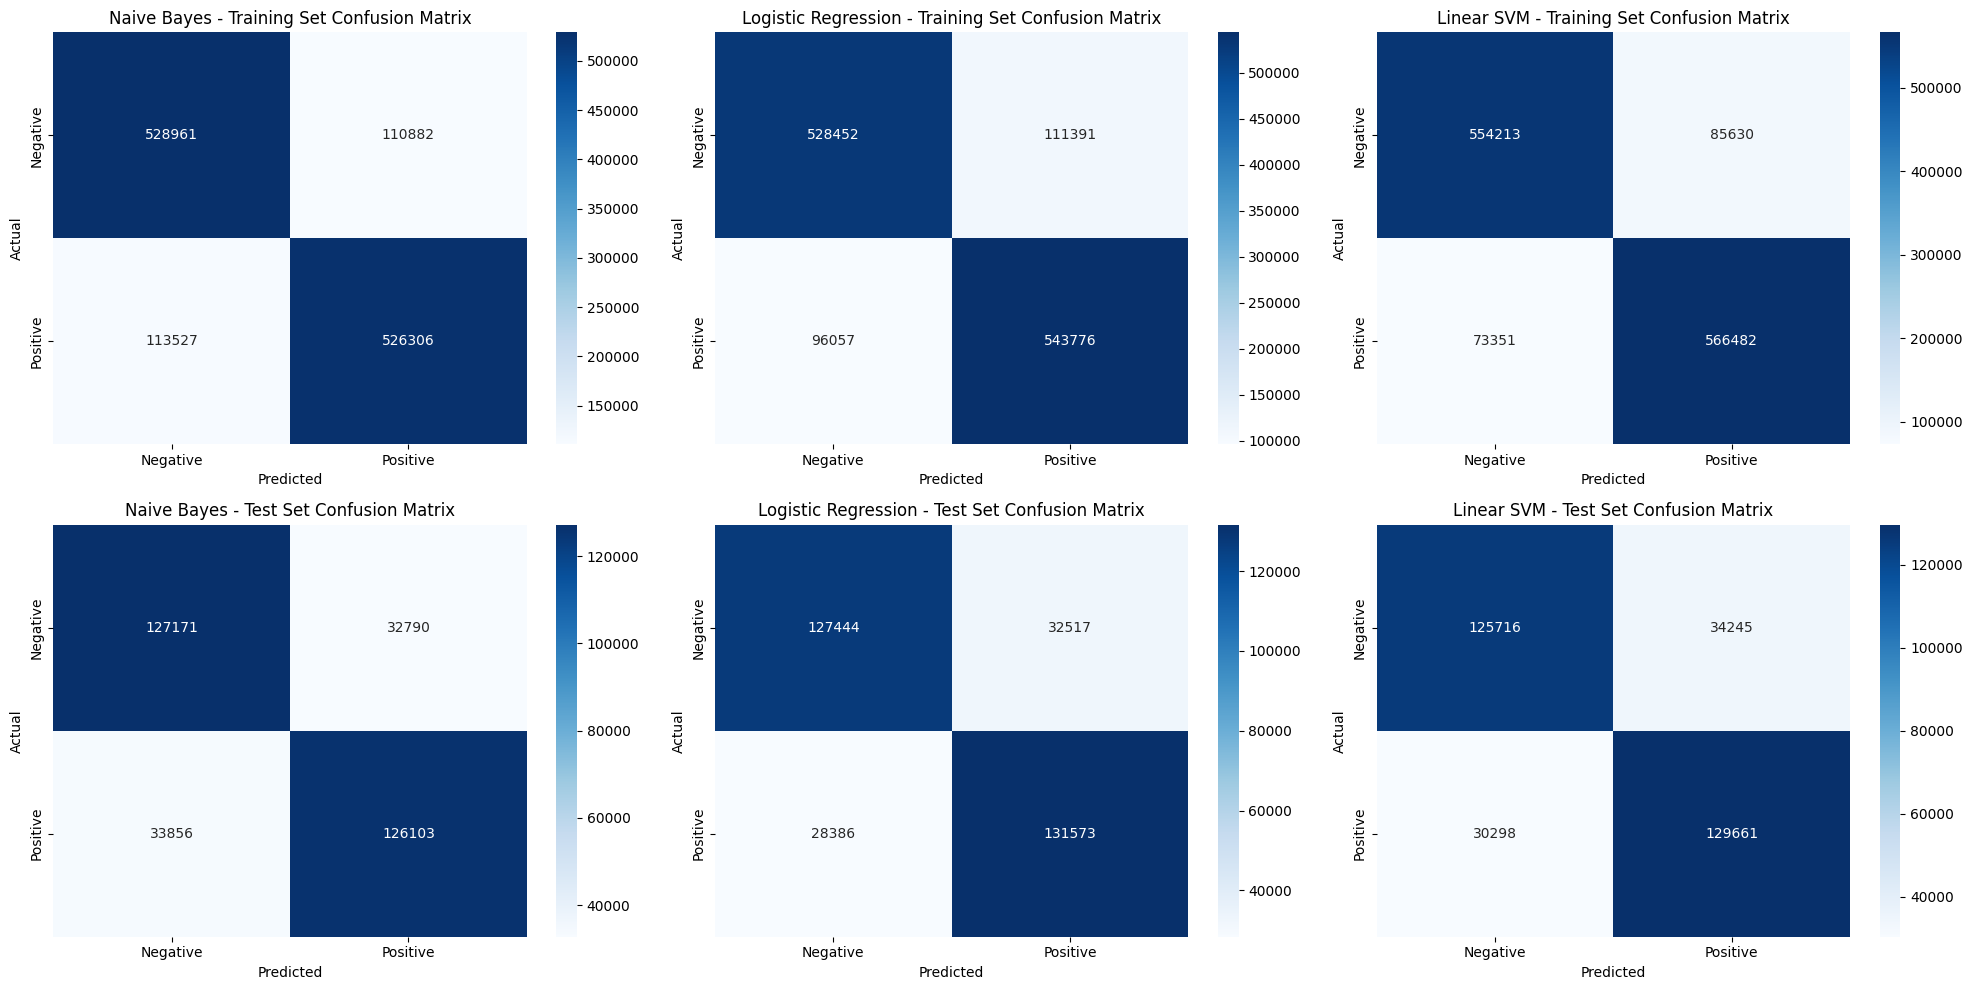


Generating ROC curves...


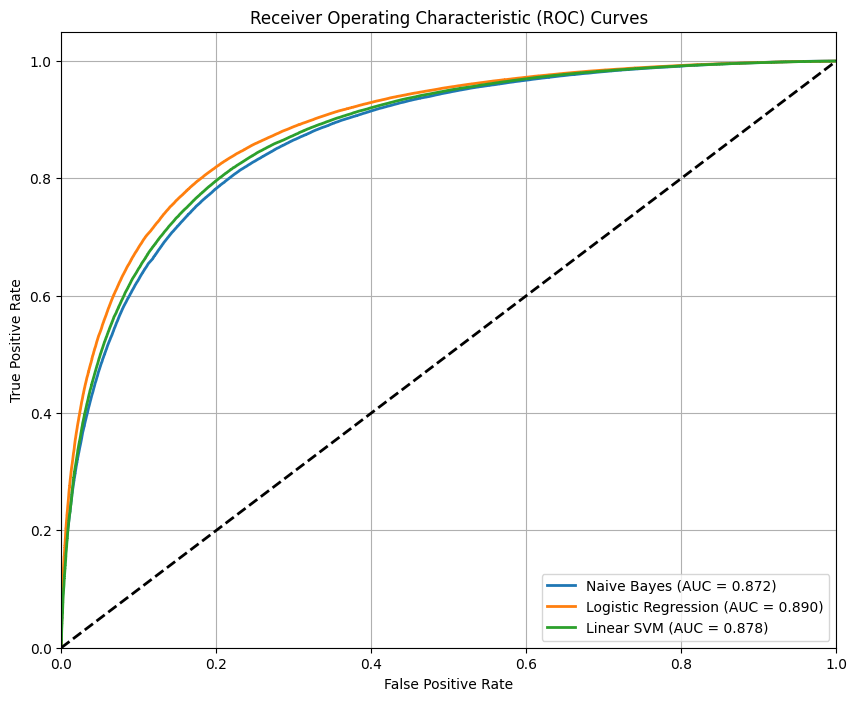


SUMMARY OF MODEL PERFORMANCE
Model                Train Accuracy  Test Accuracy  
--------------------------------------------------
Naive Bayes          0.8246           0.7917
Logistic Regression  0.8379           0.8096
Linear SVM           0.8758           0.7983

Best model saved as best_model_Logistic Regression.joblib


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Convert sentiment labels to numeric for modeling
df['sentiment_label'] = df['sentiment'].map({'Negative': 0, 'Positive': 1})

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], 
    df['sentiment_label'],
    test_size=0.2, 
    random_state=42,
    stratify=df['sentiment_label']
)

# Create TF-IDF features with unigrams, bigrams and trigrams
tfidf_vectorizer = TfidfVectorizer(
    min_df=5,               # Minimum document frequency
    max_df=0.8,             # Maximum document frequency
    ngram_range=(1, 3),     # Include unigrams, bigrams, and trigrams
    sublinear_tf=True       # Apply sublinear tf scaling
)

# Create models dictionary
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1, random_state=42),
    'Linear SVM': LinearSVC(C=1, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training and Evaluating {name}...")
    print(f"{'='*50}")
    
    # Create pipeline with TF-IDF and model
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Evaluate on training set
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    
    # Evaluate on test set
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_conf_matrix': train_conf_matrix,
        'test_conf_matrix': test_conf_matrix,
        'model': pipeline
    }
    
    # Display only test set results
    print(f"\n{name} - TEST SET METRICS:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Negative', 'Positive']))
    print("\nConfusion Matrix:")
    print(test_conf_matrix)

# Find best model based on test accuracy
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\nBest model: {best_model_name} with test accuracy {results[best_model_name]['test_accuracy']:.4f}")

# Feature importance for the best model (for models that support it)
if best_model_name in ['Logistic Regression', 'Linear SVM']:
    # Get feature names and coefficients
    feature_names = results[best_model_name]['model'].named_steps['tfidf'].get_feature_names_out()
    
    if best_model_name == 'Logistic Regression':
        coefficients = results[best_model_name]['model'].named_steps['model'].coef_[0]
    else:  # Linear SVM
        coefficients = results[best_model_name]['model'].named_steps['model'].coef_[0]
    
    # Get top positive and negative features
    top_positive_idx = np.argsort(coefficients)[-20:]
    top_negative_idx = np.argsort(coefficients)[:20]
    
    # Display most important features
    print("\nTop 20 features associated with positive sentiment:")
    for idx in reversed(top_positive_idx):
        print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")
    
    print("\nTop 20 features associated with negative sentiment:")
    for idx in top_negative_idx:
        print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")
elif best_model_name == 'XGBoost':
    # Get feature importances for XGBoost
    feature_names = results[best_model_name]['model'].named_steps['tfidf'].get_feature_names_out()
    importances = results[best_model_name]['model'].named_steps['model'].feature_importances_
    
    # Get top important features
    indices = np.argsort(importances)[-20:]
    
    print("\nTop 20 important features for XGBoost:")
    for idx in reversed(indices):
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Plot confusion matrices for all models (training and testing)
plt.figure(figsize=(20, 10))
for i, (name, result) in enumerate(results.items()):
    # Training set confusion matrix
    plt.subplot(2, len(models), i+1)
    sns.heatmap(result['train_conf_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f"{name} - Training Set Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Test set confusion matrix
    plt.subplot(2, len(models), i+len(models)+1)
    sns.heatmap(result['test_conf_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f"{name} - Test Set Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
plt.tight_layout()
plt.savefig('ml_confusion_matrices.png')
plt.show()

# Generate ROC curves for test set
def plot_roc_curves(models_dict):
    plt.figure(figsize=(10, 8))
    
    for name, result in models_dict.items():
        pipeline = result['model']
        
        try:
            # Try to get probability predictions
            if hasattr(pipeline.named_steps['model'], "predict_proba"):
                y_prob = pipeline.predict_proba(X_test)[:, 1]
            elif hasattr(pipeline.named_steps['model'], "decision_function"):
                # For models like SVM that use decision_function instead
                y_prob = pipeline.decision_function(X_test)
            else:
                print(f"Model {name} doesn't support predict_proba or decision_function. Skipping ROC curve.")
                continue
                
            # Calculate ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            
            # Plot ROC curve
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
        except Exception as e:
            print(f"Error generating ROC curve for {name}: {e}")
    
    # Plot the random guessing line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig('roc_curves.png')
    plt.show()

# Generate ROC curves for test set
print("\nGenerating ROC curves...")
plot_roc_curves(results)

# Print summary table of all metrics
print("\nSUMMARY OF MODEL PERFORMANCE")
print(f"{'Model':<20} {'Train Accuracy':<15} {'Test Accuracy':<15}")
print(f"{'-'*50}")
for name, result in results.items():
    print(f"{name:<20} {result['train_accuracy']:.4f}{' '*10} {result['test_accuracy']:.4f}")

# Save the best model for later use
joblib.dump(results[best_model_name]['model'], f'best_model_{best_model_name}.joblib')
print(f"\nBest model saved as best_model_{best_model_name}.joblib")